In [2]:
import os
import sys
import json
import time
import datetime
from importlib import reload

import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import external as ext

In [166]:
### Heatmap dataframe

In [3]:
x = list(range(0,817))
heat = pd.DataFrame(columns=x,index=x)
heat = heat.fillna(0)
heat.head()
#  "Desert_Main": "Miramar", 0 - 816,000
#  "DihorOtok_Main": "Vikendi", 0 - 612,000 
#  "Erangel_Main": "Erangel", 0 - 816,000
#  "Baltic_Main": "Erangel (Remastered)", 0 - 816,000
#  "Range_Main": "Camp Jackal", 0 - 204,000
#  "Savage_Main": "Sanhok", 0 - 408,000
#  "Summerland_Main": "Karakin"

,0,1,2,3,4,5,6,7,8,9,...,807,808,809,810,811,812,813,814,815,816
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def heatmap(x,y):
    heat.iloc[y,x] = heat.iloc[y,x] + 1

# <font color=red> Preparing DataFrame </font>

In [6]:
# RUN THIS CELL TO WORK WITH THE FILE UPLOADED IN THE REPOSITORY
# read files extracted from this as DataFrame
with open('telemetry_data/2020-04-09/pc/4c76d82b-90f7-4fd1-9ceb-97b99347e94e.json', 'r') as file:
    json_data = file.read()
    file.close()
data = []
for i in json.loads(json_data):
    if i["_T"] in ("LogParachuteLanding","LogMatchStart"):
        data.append(i)

In [7]:
# get events data into pandas dataframe
data = pd.read_json(json.dumps(data))
data.head()

,_D,_T,blueZoneCustomOptions,cameraViewBehaviour,character,characters,common,distance,isCustomGame,isEventMode,mapName,teamSize,weatherId
0,2020-04-08T22:34:53.674Z,LogMatchStart,[],FpsAndTps,NaN,"[{'character': {'name': 'OMGNOWAYTHATSBS', 'te...",{'isGame': 0.10000000149011601},NaN,0.0,0.0,Desert_Main,4.0,Sunrise
1,2020-04-08T22:35:56.829Z,LogParachuteLanding,NaN,NaN,"{'name': 'Jubly', 'teamId': 12, 'health': 100,...",NaN,{'isGame': 0.10000000149011601},337.667511,NaN,NaN,NaN,NaN,NaN
2,2020-04-08T22:35:57.894Z,LogParachuteLanding,NaN,NaN,"{'name': 'Azarothe', 'teamId': 23, 'health': 1...",NaN,{'isGame': 0.10000000149011601},373.556854,NaN,NaN,NaN,NaN,NaN
3,2020-04-08T22:35:57.930Z,LogParachuteLanding,NaN,NaN,"{'name': 'Faxe99', 'teamId': 23, 'health': 100...",NaN,{'isGame': 0.10000000149011601},315.659302,NaN,NaN,NaN,NaN,NaN
4,2020-04-08T22:36:02.926Z,LogParachuteLanding,NaN,NaN,"{'name': 'INOV77', 'teamId': 23, 'health': 100...",NaN,{'isGame': 0.10000000149011601},333.708557,NaN,NaN,NaN,NaN,NaN


In [221]:
# copy match id to all rows and drop LogMatchDefinition event
matchid = json.loads(json_data)[0]["MatchId"]
data['MatchId'] = matchid

#reset indexes
data.reset_index(drop=True, inplace=True)
data.head()

,_D,_T,character,common,distance,MatchId
0,2020-04-08T07:39:35.750Z,LogParachuteLanding,"{'name': 'iVanishing', 'teamId': 10, 'health':...",{'isGame': 0.10000000149011601},289.119873,match.bro.official.pc-2018-06.steam.duo-fpp.se...
1,2020-04-08T07:39:35.797Z,LogParachuteLanding,"{'name': 'Choc0Taco', 'teamId': 7, 'health': 1...",{'isGame': 0.10000000149011601},276.753845,match.bro.official.pc-2018-06.steam.duo-fpp.se...
2,2020-04-08T07:39:35.993Z,LogParachuteLanding,"{'name': 'BUDIBOMBER', 'teamId': 16, 'health':...",{'isGame': 0.10000000149011601},267.880615,match.bro.official.pc-2018-06.steam.duo-fpp.se...
3,2020-04-08T07:39:37.927Z,LogParachuteLanding,"{'name': 'HuYaT1one', 'teamId': 7, 'health': 1...",{'isGame': 0.10000000149011601},302.167389,match.bro.official.pc-2018-06.steam.duo-fpp.se...
4,2020-04-08T07:39:38.665Z,LogParachuteLanding,"{'name': 'Ambition_LZS', 'teamId': 13, 'health...",{'isGame': 0.10000000149011601},312.381195,match.bro.official.pc-2018-06.steam.duo-fpp.se...


### Extracting Player information variables

In [222]:
# get player information
from pandas.io.json import json_normalize
data = pd.concat([data, json_normalize(data['character'])], axis=1).drop(['character', 'zone'], axis=1)
data.head()

,_D,_T,common,distance,MatchId,accountId,health,isInBlueZone,isInRedZone,location.x,location.y,location.z,name,ranking,teamId
0,2020-04-08T07:39:35.750Z,LogParachuteLanding,{'isGame': 0.10000000149011601},289.119873,match.bro.official.pc-2018-06.steam.duo-fpp.se...,account.bbadba9bc23d4a4fbabd282a64f4d423,100,False,False,58879.285156,160055.015625,1079.511475,iVanishing,0,10
1,2020-04-08T07:39:35.797Z,LogParachuteLanding,{'isGame': 0.10000000149011601},276.753845,match.bro.official.pc-2018-06.steam.duo-fpp.se...,account.00a558d0a8fa4bd6ade680b4b5f9c2bb,100,False,False,73539.726562,167719.078125,1395.660522,Choc0Taco,0,7
2,2020-04-08T07:39:35.993Z,LogParachuteLanding,{'isGame': 0.10000000149011601},267.880615,match.bro.official.pc-2018-06.steam.duo-fpp.se...,account.a8da792f6fc24c79b11631f67e4b2a3a,100,False,False,28709.345703,171869.875000,729.824646,BUDIBOMBER,0,16
3,2020-04-08T07:39:37.927Z,LogParachuteLanding,{'isGame': 0.10000000149011601},302.167389,match.bro.official.pc-2018-06.steam.duo-fpp.se...,account.dd84940d868b4da38cfd7a72843952b8,100,False,False,73251.195312,167743.812500,1377.781616,HuYaT1one,0,7
4,2020-04-08T07:39:38.665Z,LogParachuteLanding,{'isGame': 0.10000000149011601},312.381195,match.bro.official.pc-2018-06.steam.duo-fpp.se...,account.1d9a02ab38c94a3ba5baec4ce96c61f8,100,False,False,25356.693359,161222.500000,853.357239,Ambition_LZS,0,13


In [223]:
land = data[['location.x','location.y']].apply(lambda x: x // 1000)
land = land.astype(int)
#land #.head()

In [224]:
records = land.to_records(index=False)
result = list(records)
#result

In [225]:
for i in result:
    heatmap(*i)

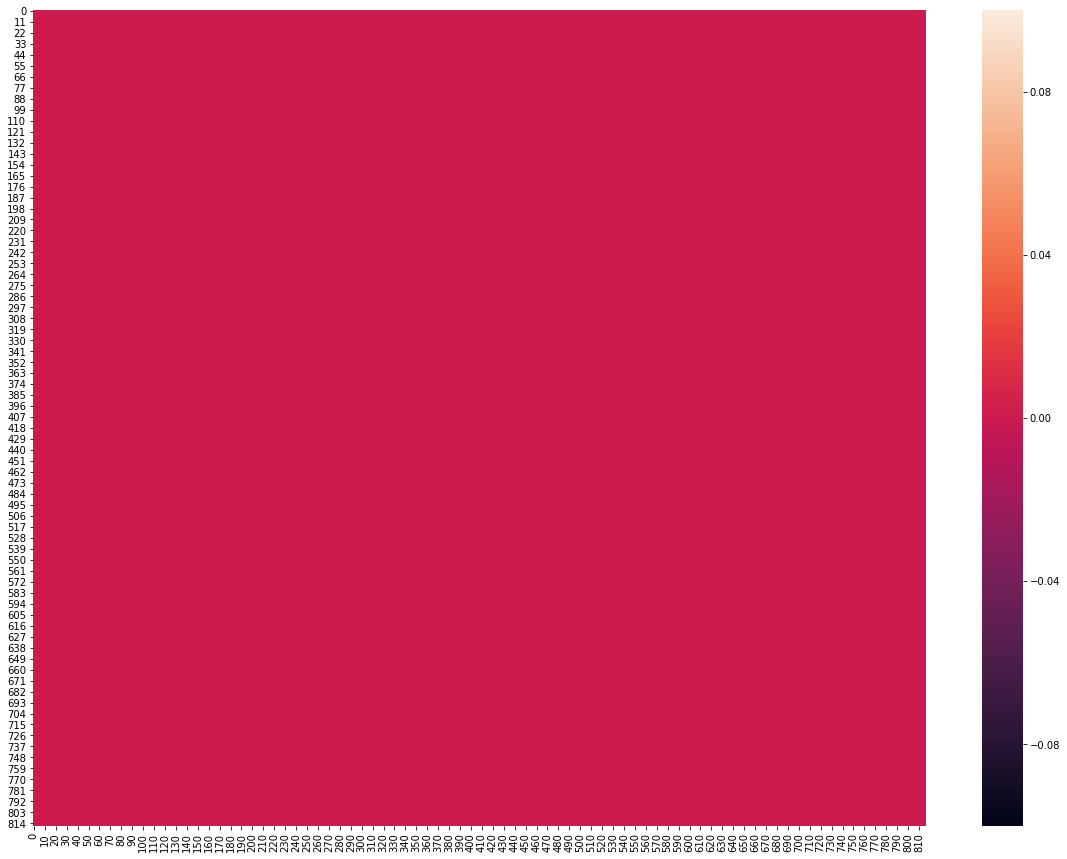

In [228]:
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(20,15))
sns.heatmap(heat)